In [29]:
import warnings
warnings.filterwarnings("ignore")

#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score

In [3]:
#Read the flights
df = pd.read_csv('data/EDA_for_models.csv')
df.head()

,distance,arr_delay,crs_dep_time_convert,crs_arr_time_convert,duration,average_speed,avg_dep_delay_by_carrier,avgfuel_percustomer_perdistance,yearly_arrivals_per_ap,yearly_arriving_passengers_per_ap,...,month_10,month_11,month_12,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,-1.121064,-0.082922,1.199988,1.059334,-0.970006,-2.346811,0.751258,0.666065,0.728606,0.432927,...,0,0,0,1,0,0,0,0,0,0
1,-0.827246,-0.082922,0.531634,0.441222,-0.909598,-0.844355,0.751258,0.666065,-0.785920,-0.705407,...,0,0,0,0,0,0,0,0,1,0
2,-0.402228,-0.082922,0.363706,0.428543,-0.214905,-0.448253,0.751258,0.666065,-1.117036,-1.129657,...,0,0,0,0,1,0,0,0,0,0
3,-0.513102,-0.082922,-0.794999,-0.795002,-0.834088,0.542002,-0.355855,-1.109920,-0.512376,-0.378314,...,0,0,0,0,0,1,0,0,0,0
4,-0.461361,-0.082922,-0.778206,-0.684059,-0.381027,-0.359471,0.667968,0.913843,-1.104272,-1.131256,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# Create features (X) and labels (y)
y = df['arr_delay']
X = df.drop(['arr_delay','flight_delay','average_speed'], axis=1)

In [9]:
# Perform the split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# Build a regular tree as baseline
regressor_tree = DecisionTreeRegressor(ccp_alpha=0.001, max_depth=5)
#(ccp_alpha=0.001,random_state=0)
regressor_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.001, max_depth=5)

In [12]:
regressor_tree.feature_importances_

array([0.        , 0.53400374, 0.06534429, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05248765, 0.        ,
       0.        , 0.        , 0.24446784, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04806302, 0.05563346,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

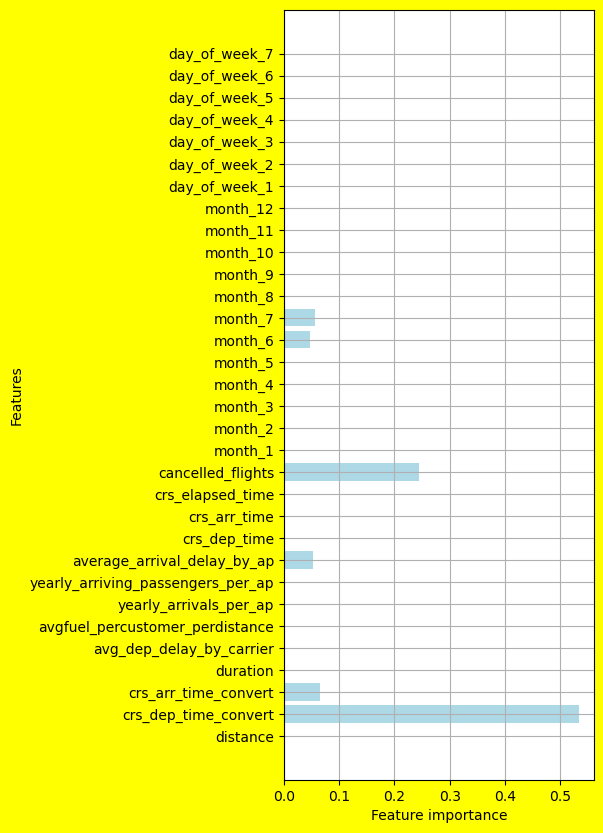

In [18]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(4, 10))
    plt.barh(range(n_features), model.feature_importances_, color='lightblue', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "yellow"
    plt.grid(True)
plot_feature_importances(regressor_tree)

In [20]:
regressor_tree.score(X_train,y_train)

0.02397130403987424

In [22]:
regressor_tree.score(X_test,y_test)

0.012820602481881327

In [23]:
# Test set predictions
prediction=regressor_tree.predict(X_test)

<Axes: xlabel='arr_delay', ylabel='Density'>

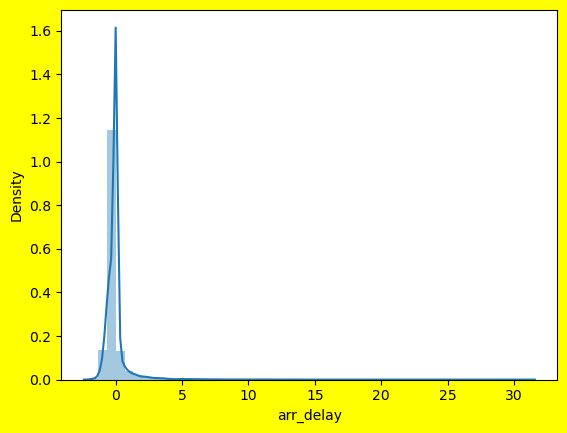

In [26]:
sns.distplot(y_test-prediction)